Reinforcement Learning

In [25]:
import numpy as np 
import pylab as pl 
import networkx as nx

GRAPH DECLARATION

In [26]:
edges = [(0,1),(1,5),(1,2),(1,3),(5,4),(9,10),(2,4),(0,6),(2,4),(0,6),(6,7),(8,9),(7,8),(1,7),(3,9),(10,8),(10,10)]

DEFINE R

<function matplotlib.pyplot.show(close=None, block=None)>

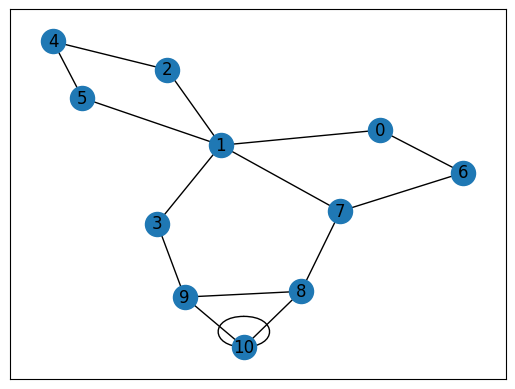

In [27]:
goal=10
G=nx.Graph()
G.add_edges_from(edges)
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
pl.show

DEFINING R

In [28]:
Matrix_size=11
R = np.matrix(np.ones(shape=(Matrix_size, Matrix_size)))
R = R*-1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [29]:
for edge in edges:
    if(edge[1] == goal):
        R[edge] = 100
    else:
        R[edge] = 0
    if(edge[0] == goal ):
        R[edge[::1]] = 100
    else:
        R[edge[::-1]] = 0

In [30]:
R[goal,goal] = 100
print(R)

[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.   0. 100.]]


DECLARATION OF Q MATRIX 

In [31]:
Q = np.matrix(np.zeros([Matrix_size,Matrix_size]))

In [32]:
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

CURRENT STATE

In [33]:
initialize_state = 1

In [34]:
def available_actions(state):
    current_state_row = R[state]
    available_states = np.where(current_state_row >- 1)[1]
    return available_states

In [35]:
def next_state(available_actions):
    next_action = np.random.choice(available_actions,1)
    return next_action
    

In [36]:
def Q_update(current_state, next_state, gaama):
    max_index = np.where(Q[next_state,] == np.max(Q[next_state , ]))[1]
    if(max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index,1))
    else:
        max_index = int(max_index)
    max_value = Q[next_state, max_index]
    Q[current_state, next_state] = R[current_state, next_state] + gaama * max_value
    if(np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)

In [38]:
Q_score = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available = available_actions(current_state)
    action = next_state(available)
    score = Q_update(current_state, action, gaama=0.75)
    Q_score.append(score)

C:\Users\prash\AppData\Local\Temp\ipykernel_10260\2298931323.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index,1))
C:\Users\prash\AppData\Local\Temp\ipykernel_10260\2298931323.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


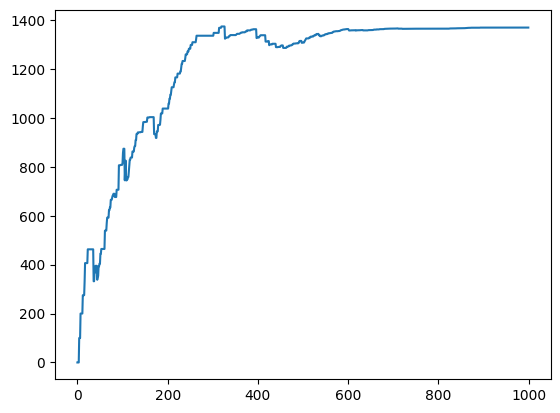

In [39]:
pl.plot(Q_score)

In [42]:
current_state = 2
steps=[current_state]
while current_state!=goal:
    max_index = np.where(Q[current_state,] == np.max(Q[current_state , ]))[1]
    if(max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index,1))
    else:
        max_index = int(max_index)
    steps.append(max_index)
    current_state = max_index

print(steps)

[2, 1, 3, 9, 10]


C:\Users\prash\AppData\Local\Temp\ipykernel_10260\1186161055.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)
